In [1]:
# !pip install pyfolio-reloaded

In [2]:
import numpy as np
import pandas as pd
import pyfolio as pf

import nasdaqdatalink

In [3]:
df = pd.DataFrame()
for symbol in ["WIKI/AAPL", "WIKI/IBM"]:
    _df_quandl = nasdaqdatalink.get(symbol)
    df[symbol] = _df_quandl["Adj. Close"]
df.index = pd.to_datetime(df.index, utc=True)

df

,WIKI/AAPL,WIKI/IBM
Date,,
1980-12-12 00:00:00+00:00,0.422706,8.678113
1980-12-15 00:00:00+00:00,0.400652,8.513130
1980-12-16 00:00:00+00:00,0.371246,8.744106
1980-12-17 00:00:00+00:00,0.380362,8.612120
1980-12-18 00:00:00+00:00,0.391536,8.398302
...,...,...
2018-03-21 00:00:00+00:00,171.270000,156.690000
2018-03-22 00:00:00+00:00,168.845000,152.090000
2018-03-23 00:00:00+00:00,164.940000,148.890000


In [4]:
df_returns = df.loc["2013-12-31": "2018-03-31"].pct_change().dropna()
df_returns

,WIKI/AAPL,WIKI/IBM
Date,,
2014-01-02 00:00:00+00:00,-0.014064,-0.010876
2014-01-03 00:00:00+00:00,-0.021966,0.005983
2014-01-06 00:00:00+00:00,0.005453,-0.003429
2014-01-07 00:00:00+00:00,-0.007156,0.019946
2014-01-08 00:00:00+00:00,0.006338,-0.009172
...,...,...
2018-03-21 00:00:00+00:00,-0.022655,0.003137
2018-03-22 00:00:00+00:00,-0.014159,-0.029357
2018-03-23 00:00:00+00:00,-0.023128,-0.021040


In [5]:
symbol = "WIKI/AAPL"

<AxesSubplot:title={'center':'Annual returns'}, xlabel='Returns', ylabel='Year'>

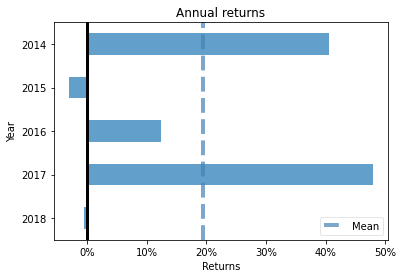

In [6]:
pf.plotting.plot_annual_returns(returns=df_returns[symbol])

<AxesSubplot:title={'center':'Top 10 drawdown periods'}, ylabel='Cumulative returns'>

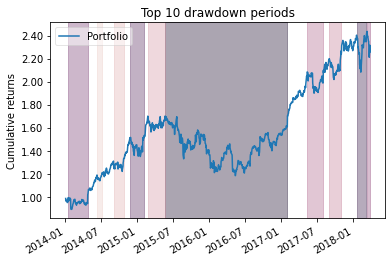

In [7]:
pf.plotting.plot_drawdown_periods(returns=df_returns[symbol])

<AxesSubplot:title={'center':'Underwater plot'}, ylabel='Drawdown'>

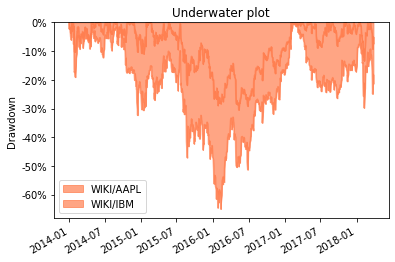

In [8]:
pf.plotting.plot_drawdown_underwater(returns=df_returns)

<AxesSubplot:title={'center':'Distribution of monthly returns'}, xlabel='Returns', ylabel='Number of months'>

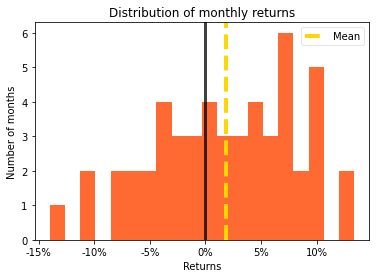

In [9]:
pf.plotting.plot_monthly_returns_dist(returns=df_returns[symbol])

<AxesSubplot:title={'center':'Monthly returns (%)'}, xlabel='Month', ylabel='Year'>

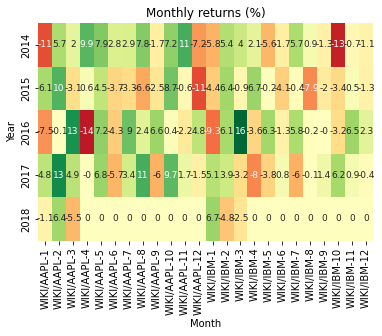

In [10]:
pf.plotting.plot_monthly_returns_heatmap(returns=df_returns)

/home/oga/.local/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<AxesSubplot:xlabel='Date'>

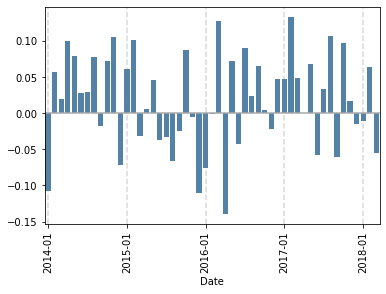

In [11]:
pf.plotting.plot_monthly_returns_timeseries(returns=df_returns[symbol])

<AxesSubplot:title={'center':'Return quantiles'}>

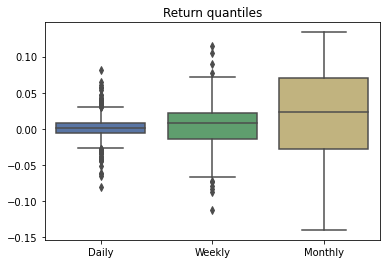

In [12]:
pf.plotting.plot_return_quantiles(returns=df_returns[symbol])

<AxesSubplot:xlabel='Date', ylabel='Returns'>

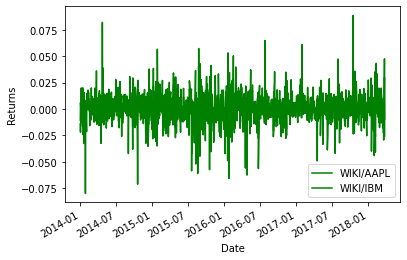

In [13]:
pf.plotting.plot_returns(returns=df_returns)

<AxesSubplot:xlabel='Date', ylabel='Cumulative returns'>

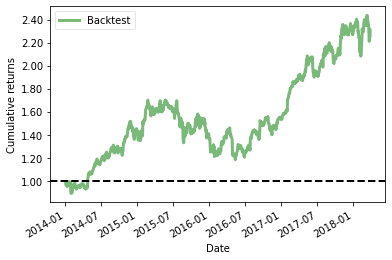

In [14]:
pf.plotting.plot_rolling_returns(returns=df_returns[symbol])

<AxesSubplot:title={'center':'Rolling Sharpe ratio (6-month)'}, ylabel='Sharpe ratio'>

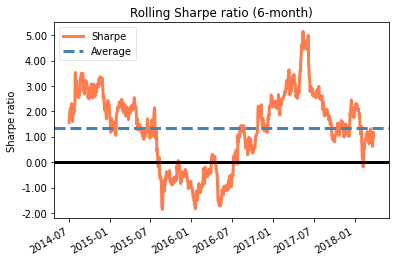

In [15]:
pf.plotting.plot_rolling_sharpe(returns=df_returns[symbol])

<AxesSubplot:title={'center':'Rolling volatility (6-month)'}, ylabel='Volatility'>

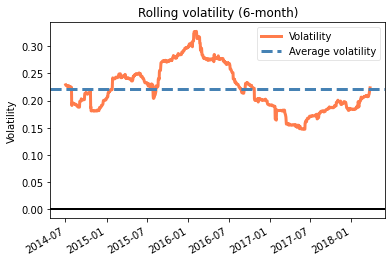

In [16]:
pf.plotting.plot_rolling_volatility(returns=df_returns[symbol])

In [17]:
pf.plotting.show_perf_stats(returns=df_returns[symbol])

Start date,2014-01-02
End date,2018-03-27
Total months,50
,Backtest
Annual return,21.269%
Cumulative returns,125.741%
Annual volatility,22.845%
Sharpe ratio,0.96
Calmar ratio,0.70
Stability,0.71
Max drawdown,-30.444%


In [18]:
pf.plotting.show_worst_drawdown_periods(returns=df_returns[symbol])

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,30.44,2015-05-22,2016-05-12,2017-02-01,444
1,13.35,2018-01-18,2018-02-08,2018-03-09,37
2,10.93,2014-11-26,2015-01-16,2015-02-04,51
3,10.33,2014-01-15,2014-01-30,2014-04-24,72
4,9.23,2018-03-12,2018-03-23,NaT,NaN


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,30.44,2015-05-22,2016-05-12,2017-02-01,444
1,13.35,2018-01-18,2018-02-08,2018-03-09,37
2,10.93,2014-11-26,2015-01-16,2015-02-04,51
3,10.33,2014-01-15,2014-01-30,2014-04-24,72
4,9.23,2018-03-12,2018-03-23,NaT,NaN


/home/oga/.local/lib/python3.8/site-packages/pyfolio/timeseries.py:1258: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


Stress Events,mean,min,max
Apr14,0.46%,-1.57%,8.20%
Oct14,0.31%,-1.56%,2.72%
Fall2015,-0.14%,-6.12%,5.74%
New Normal,0.09%,-7.99%,8.20%


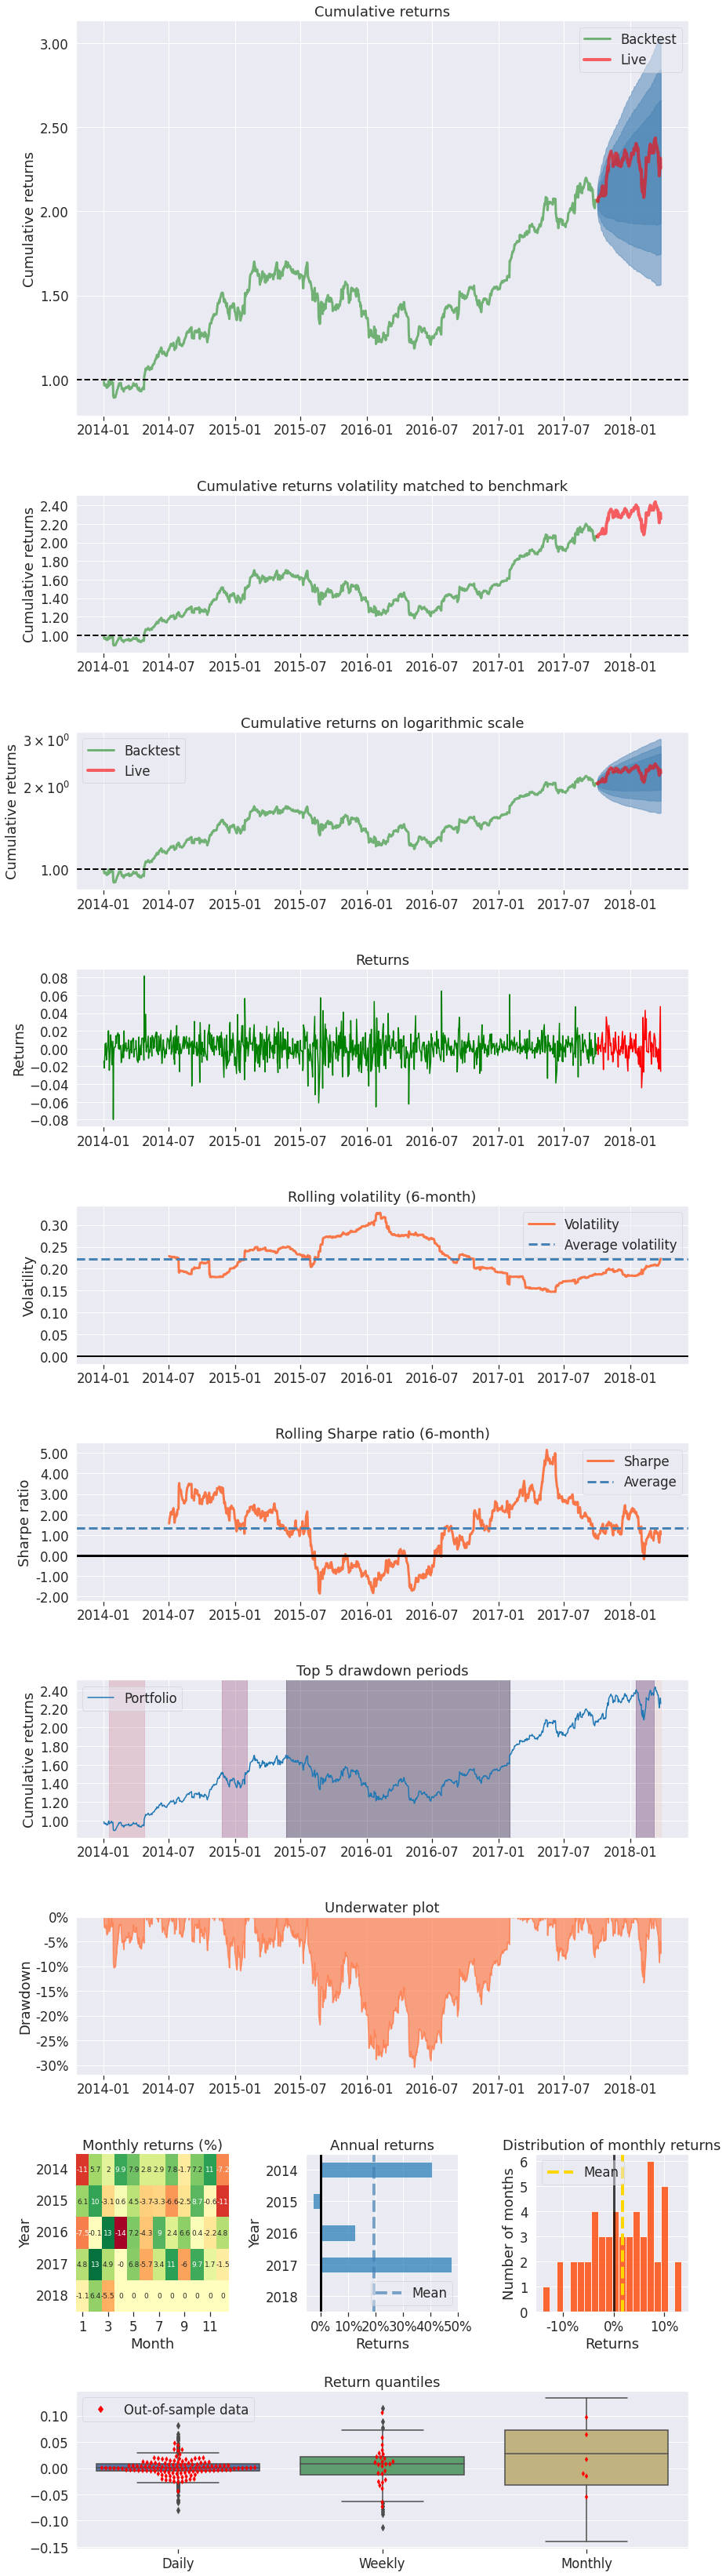

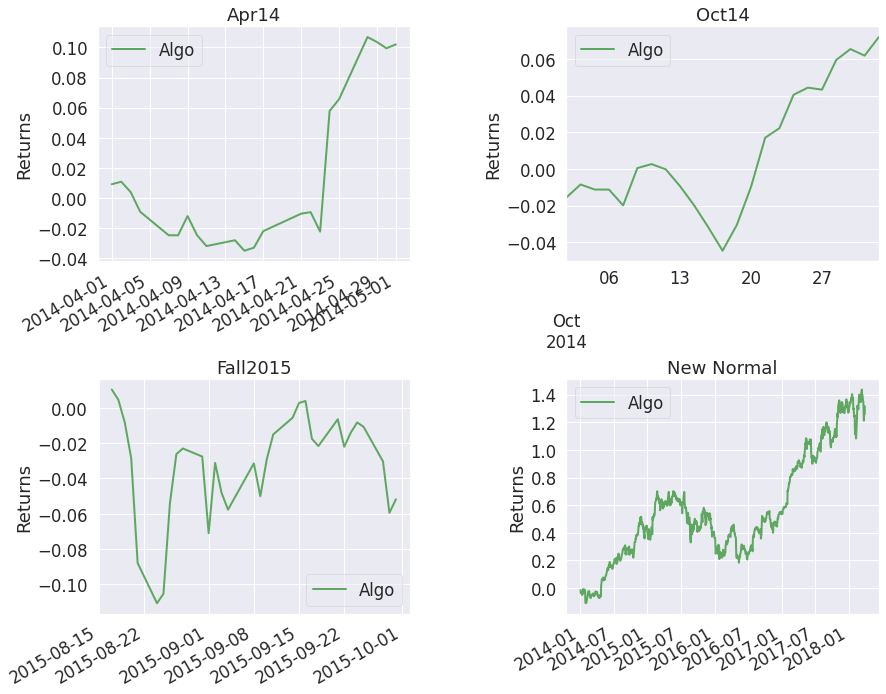

In [19]:
pf.create_full_tear_sheet(
    returns=df_returns[symbol],
#     positions=None,
#     transactions=None,
    live_start_date='2017-10-01',
    hide_positions=True
)